In [1]:
#  Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Membaca file CSV
df = pd.read_csv('data_stunting 1.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [3]:
#Melihat jumlah kolom dan baris pada data
df.shape

(120999, 4)

In [4]:
#Melakukan pengecekan terhadap data yang kosong
print(df.columns[df.isna().any()].tolist())
print(df.isna().sum())

[]
Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


In [5]:
# Melihat jenis data di setiap kolom
df.dtypes

Umur (bulan)           int64
Jenis Kelamin         object
Tinggi Badan (cm)    float64
Status Gizi           object
dtype: object

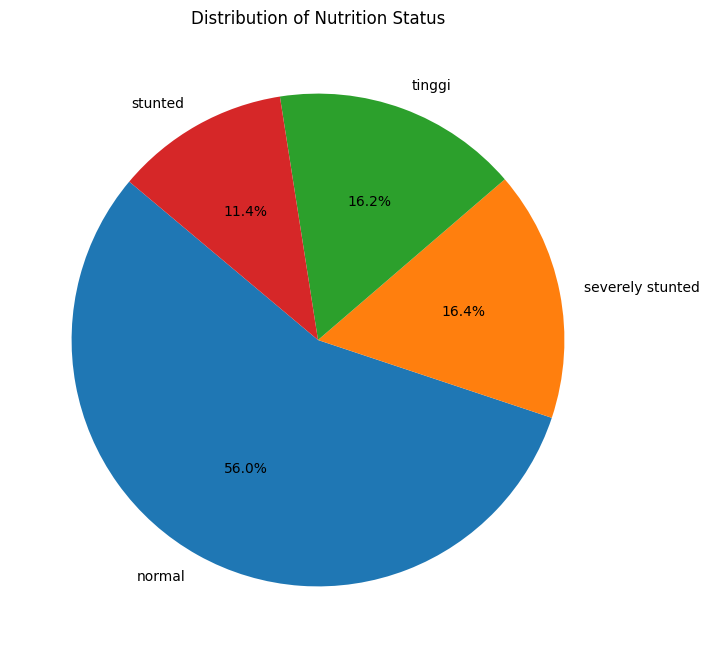

In [24]:
# Menghitung jumlah kemunculan setiap kategori dalam kolom 'Status Gizi'
status_gizi_counts = df['Status Gizi'].value_counts()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(status_gizi_counts, labels=status_gizi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nutrition Status')
plt.show()


In [10]:
# Encoding variabel kategorikal (jenis kelamin)
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

In [11]:
# Pisahkan variabel target dan variabel fitur
X = df.drop('Status Gizi', axis=1)  # Variabel fitur
Y = df['Status Gizi']               # Variabel target

In [12]:
#Pembagian dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# List n_estimators yang akan digunakan
n_estimators_list = [10, 50, 100, 150, 200]
best_accuracy = 0
best_n_estimators = 0
acc_train_rf = []
acc_test_rf = []

for n_estimators in n_estimators_list:
    # Inisialisasi model Random Forest
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Latih model menggunakan data latih
    clf.fit(X_train, Y_train)

    # Lakukan prediksi menggunakan data uji
    Y_pred = clf.predict(X_test)

    # Hitung akurasi model
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"\nAccuracy for n_estimators = {n_estimators}:", accuracy)

    # Tampilkan classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))

    # Tampilkan confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))

    # Perbarui nilai best estimator jika ditemukan akurasi yang lebih tinggi
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

    # Simpan akurasi untuk data latih dan data uji
    acc_train_rf.append(clf.score(X_train, Y_train))
    acc_test_rf.append(accuracy)

# Tampilkan hasil akhir
print("\nThe best estimator is", best_n_estimators, "with accuracy of", best_accuracy)


Accuracy for n_estimators = 10: 0.9989669421487604

Classification Report:
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       1.00      1.00      1.00      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200


Confusion Matrix:
[[13376     0     6     0]
 [    0  4129     1     0]
 [    2     6  2782     0]
 [   10     0     0  3888]]

Accuracy for n_estimators = 50: 0.9990909090909091

Classification Report:
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       1.00      1.00      1.00      2790
          tinggi    


Confusion Matrix:
[[13375     0     6     1]
 [    0  4129     1     0]
 [    1     4  2785     0]
 [    9     0     0  3889]]


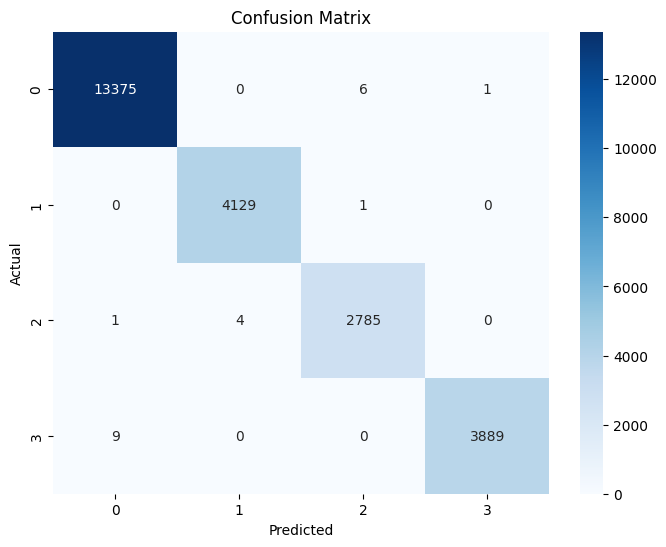

In [17]:
# Inisialisasi model Random Forest dengan best estimator
best_n_estimators = 100
clf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Tampilkan confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


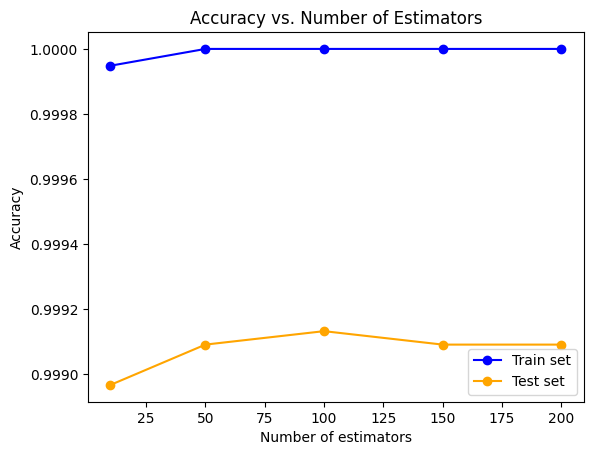

In [23]:
# Plot akurasi terhadap jumlah estimators
plt.plot(n_estimators_list, acc_train_rf, 'o-', color='blue')
plt.plot(n_estimators_list, acc_test_rf, 'o-', color='orange')
plt.legend(['Train set', 'Test set'])
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.show()